In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, HuberRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import numpy as np
import pandas as pd
import random
from jupyterthemes import jtplot
jtplot.style()

In [2]:
boston = datasets.load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X, y = boston['data'], boston['target']

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

Лассо регрессия

In [6]:
lasso_reg = Lasso()

In [7]:
# Для лассо только один параметр можно подобрать - альфа
params = np.logspace(-7, 2, 100)
lasso_params = dict(alpha=params)
grid_lasso = GridSearchCV(lasso_reg, lasso_params, cv=10, verbose=2, n_jobs=-1)
grid_lasso.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.3s finished


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.23284674e-07, 1.51991108e-07, 1.87381742e-07,
       2.31012970e-07, 2.84803587e-07, 3.51119173e-07, 4.32876128e-07,
       5.33669923e-07, 6.57933225e-07, 8.11130831e-07, 1.00000000e-06,
       1.23284674e-06, 1.51991108e-06, 1.87381742e-06, 2.31012970e-06,
       2.84803587e-06, 3.51119173e-06, 4.3287...
       8.11130831e-01, 1.00000000e+00, 1.23284674e+00, 1.51991108e+00,
       1.87381742e+00, 2.31012970e+00, 2.84803587e+00, 3.51119173e+00,
       4.32876128e+00, 5.33669923e+00, 6.57933225e+00, 8.11130831e+00,
       1.00000000e+01, 1.23284674e+01, 1.51991108e+01, 1.87381742e+01,
       2.31012970e+01, 2.84803587e+01, 3.51119173e+01, 4.32876128e+01,
       5.33669923e+01, 6.57933225e+01, 8.11130831e+01, 1.00000000e+02])},
             verbose=2)

In [8]:
# view the complete results (list of named tuples)
for k in grid_lasso.cv_results_:
    print(k, ":", grid_lasso.cv_results_[k][0])

mean_fit_time : 0.09199879169464112
std_fit_time : 0.06346017747389045
mean_score_time : 0.007221341133117676
std_score_time : 0.0027601156805036396
param_alpha : 1e-07
params : {'alpha': 1e-07}
split0_test_score : 0.7337608653409902
split1_test_score : 0.4730725937863456
split2_test_score : -1.0063140318687664
split3_test_score : 0.6411398253318428
split4_test_score : 0.5476605218437148
split5_test_score : 0.7364029360513736
split6_test_score : 0.3782839836963583
split7_test_score : -0.12922702003267905
split8_test_score : -0.7684325501132285
split9_test_score : 0.4189436884007923
mean_test_score : 0.20252908124367436
std_test_score : 0.5952959541210957
rank_test_score : 76


In [9]:
# create a list of the mean scores only
test_scores = grid_lasso.cv_results_['mean_test_score']
print(test_scores)

[ 0.20252908  0.2025291   0.20252913  0.20252916  0.2025292   0.20252925
  0.20252931  0.20252939  0.20252948  0.20252959  0.20252973  0.2025299
  0.20253011  0.20253038  0.2025307   0.2025311   0.20253159  0.20253219
  0.20253294  0.20253386  0.20253496  0.20253636  0.20253807  0.20254018
  0.20254278  0.202546    0.20255     0.20255489  0.20256092  0.20256837
  0.20257754  0.20258876  0.20260279  0.20262003  0.20264171  0.20266802
  0.20270026  0.20274011  0.20278908  0.20284983  0.20292414  0.20301558
  0.20312784  0.20326543  0.20343447  0.20364058  0.2038932   0.2042056
  0.2045997   0.20509582  0.20570696  0.20645225  0.20736845  0.20847596
  0.20982229  0.21143602  0.21339508  0.21569605  0.21840816  0.2216304
  0.22531672  0.22936895  0.2335881   0.23780311  0.24085834  0.24150751
  0.24079926  0.24590089  0.25418525  0.26147806  0.26541844  0.25851904
  0.2431432   0.22707948  0.21397174  0.21178859  0.20032608  0.1808549
  0.15609343  0.12202143  0.06628029 -0.01772707 -0.136

Text(0, 0.5, 'Cross-Validated Accuracy')

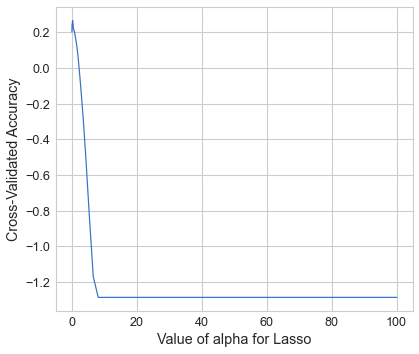

In [10]:
# plot the results
# this is identical to the one we generated above
plt.plot(params, test_scores)
plt.xlabel('Value of alpha for Lasso')
plt.ylabel('Cross-Validated Accuracy')

In [11]:
# examine the best model

# Single best score achieved across all params 
print(grid_lasso.best_score_)

# Dictionary containing the parameters  used to generate that score
print(grid_lasso.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_lasso.best_estimator_)

0.26541844300913836
{'alpha': 0.23101297000831628}
Lasso(alpha=0.23101297000831628)


Ридж-регрессия

In [15]:
rige_reg = Ridge()

In [16]:
# Для ридж-регрессии можно еще перебрать оптимизаторы
rige_params = {
    'alpha': np.logspace(-7, 2, 100),
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
grid_rige = GridSearchCV(rige_reg, rige_params, cv=10, verbose=2, n_jobs=-1)
grid_rige.fit(X, y)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   10.4s finished


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.23284674e-07, 1.51991108e-07, 1.87381742e-07,
       2.31012970e-07, 2.84803587e-07, 3.51119173e-07, 4.32876128e-07,
       5.33669923e-07, 6.57933225e-07, 8.11130831e-07, 1.00000000e-06,
       1.23284674e-06, 1.51991108e-06, 1.87381742e-06, 2.31012970e-06,
       2.84803587e-06, 3.51119173e-06, 4.3287...
       1.87381742e+00, 2.31012970e+00, 2.84803587e+00, 3.51119173e+00,
       4.32876128e+00, 5.33669923e+00, 6.57933225e+00, 8.11130831e+00,
       1.00000000e+01, 1.23284674e+01, 1.51991108e+01, 1.87381742e+01,
       2.31012970e+01, 2.84803587e+01, 3.51119173e+01, 4.32876128e+01,
       5.33669923e+01, 6.57933225e+01, 8.11130831e+01, 1.00000000e+02]),
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             verbose=2)

In [17]:
print(grid_rige.best_params_)
print(grid_rige.best_score_)
print(grid_rige.best_estimator_)

{'alpha': 100.0, 'solver': 'lsqr'}
0.3568367228898538
Ridge(alpha=100.0, solver='lsqr')


Регрессия Хьюберта

In [18]:
huber_reg = HuberRegressor()

In [19]:
# Регрессия не шибко быстрая, поэтому сделаем параметров поменьше
huber_params = {
    'alpha': np.logspace(-7, 2, 50),
    'epsilon': np.linspace(1.35, 2, 50)
}
grid_huber = GridSearchCV(huber_reg, huber_params, cv=10, verbose=2, n_jobs=-1)
grid_huber.fit(X, y)

Fitting 10 folds for each of 2500 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 7796 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 10224 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 12980 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 19460 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 23184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 25000 out of 25000 | elapsed:  1.9min finished


GridSearchCV(cv=10, estimator=HuberRegressor(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.52641797e-07, 2.32995181e-07, 3.55648031e-07,
       5.42867544e-07, 8.28642773e-07, 1.26485522e-06, 1.93069773e-06,
       2.94705170e-06, 4.49843267e-06, 6.86648845e-06, 1.04811313e-05,
       1.59985872e-05, 2.44205309e-05, 3.72759372e-05, 5.68986603e-05,
       8.68511374e-05, 1.32571137e-...
       1.54897959, 1.5622449 , 1.5755102 , 1.58877551, 1.60204082,
       1.61530612, 1.62857143, 1.64183673, 1.65510204, 1.66836735,
       1.68163265, 1.69489796, 1.70816327, 1.72142857, 1.73469388,
       1.74795918, 1.76122449, 1.7744898 , 1.7877551 , 1.80102041,
       1.81428571, 1.82755102, 1.84081633, 1.85408163, 1.86734694,
       1.88061224, 1.89387755, 1.90714286, 1.92040816, 1.93367347,
       1.94693878, 1.96020408, 1.97346939, 1.98673469, 2.        ])},
             verbose=2)

In [20]:
print(grid_huber.best_params_)
print(grid_huber.best_score_)
print(grid_huber.best_estimator_)

{'alpha': 28.117686979742366, 'epsilon': 1.8275510204081633}
0.37976089515649714
HuberRegressor(alpha=28.117686979742366, epsilon=1.8275510204081633)


ElasticNet регрессия

In [21]:
elast_reg = ElasticNet()

In [22]:
elast_params = {
    'alpha': np.logspace(-7, 2, 200),
    'l1_ratio': np.linspace(0, 1, 50)
}
grid_elast = GridSearchCV(elast_reg, elast_params, cv=10, verbose=2, n_jobs=-1)
grid_elast.fit(X, y)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4208 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 17200 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 35312 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 58672 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 87152 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  1.2min finished
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7523.026611403221, tolerance: 4.271629541501977
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.10975250e-07, 1.23155060e-07, 1.36671636e-07,
       1.51671689e-07, 1.68318035e-07, 1.86791360e-07, 2.07292178e-07,
       2.30043012e-07, 2.55290807e-07, 2.83309610e-07, 3.14403547e-07,
       3.48910121e-07, 3.87203878e-07, 4.29700470e-07, 4.76861170e-07,
       5.29197874e-07, 5.87278661e-07, 6...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             verbose=2)

In [23]:
print(grid_elast.best_params_)
print(grid_elast.best_score_)
print(grid_elast.best_estimator_)

{'alpha': 0.23816855519761607, 'l1_ratio': 0.0}
0.3571746830230368
ElasticNet(alpha=0.23816855519761607, l1_ratio=0.0)


DecisionTree

In [24]:
tree_reg = DecisionTreeRegressor()

In [25]:
tree_params = {
    'max_depth': range(1, 11),
    'splitter': ['best', 'random'],
    'criterion': ['mse', 'mae', 'friedman_mse'],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
grid_tree = GridSearchCV(tree_reg, tree_params, cv=10, verbose=2, n_jobs=-1)
grid_tree.fit(X, y)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    6.0s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'splitter': ['best', 'random']},
             verbose=2)

In [26]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'mae', 'max_depth': 5, 'min_samples_leaf': 4, 'splitter': 'best'}
0.3617113557418506
DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=4)
